In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers and regressors
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    BaggingRegressor, # Added
    AdaBoostRegressor, # Added
    GradientBoostingRegressor, # Added
    RandomForestRegressor # Added
)

from xgboost import XGBClassifier, XGBRegressor # Modified

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Modified

# Libraries to get different metric scores for classification
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Libraries to get different metric scores for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Added


# To tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Library to split data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Content/PlayerStatistics.csv"
data = pd.read_csv(path)


# copying data to another variable to avoid any changes to original data
df = data.copy()

Mounted at /content/drive


In [3]:
df

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,gameType,...,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
0,James,Johnson,201949,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,T.J.,McConnell,204456,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.000,0.0,0.0,0.000,6.0,0.0,6.0,2.0,7.0,-12.0
2,Myles,Turner,1626167,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.333,4.0,1.0,0.250,3.0,1.0,4.0,3.0,1.0,-12.0
3,Pascal,Siakam,1627783,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.400,7.0,4.0,0.571,3.0,1.0,4.0,2.0,1.0,-4.0
4,Alex,Caruso,1627936,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,Indiana,Pacers,Playoffs,...,0.400,0.0,0.0,0.000,1.0,2.0,3.0,3.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627433,Fred,Sheffield,78131,24600052,1946-11-26 19:00:00,Philadelphia,Warriors,Boston,Celtics,Regular Season,...,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627434,Connie,Simmons,78153,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,5.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627435,Johnny,Simmons,78154,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627436,Virgil,Vaughn,78411,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
columns_list = df.columns.tolist()
print(columns_list)

['firstName', 'lastName', 'personId', 'gameId', 'gameDate', 'playerteamCity', 'playerteamName', 'opponentteamCity', 'opponentteamName', 'gameType', 'gameLabel', 'gameSubLabel', 'seriesGameNumber', 'win', 'home', 'numMinutes', 'points', 'assists', 'blocks', 'steals', 'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersAttempted', 'threePointersMade', 'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade', 'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive', 'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints']


In [5]:
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627438 entries, 0 to 1627437
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   firstName                1627438 non-null  object 
 1   lastName                 1627438 non-null  object 
 2   personId                 1627438 non-null  int64  
 3   gameId                   1627438 non-null  int64  
 4   gameDate                 1627438 non-null  object 
 5   playerteamCity           1627438 non-null  object 
 6   playerteamName           1627438 non-null  object 
 7   opponentteamCity         1627438 non-null  object 
 8   opponentteamName         1627438 non-null  object 
 9   gameType                 1627438 non-null  object 
 10  gameLabel                90583 non-null    object 
 11  gameSubLabel             4387 non-null     object 
 12  seriesGameNumber         135048 non-null   float64
 13  win                      1627438 non-null 

In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
personId,1627438.0,2.710909e+05,4.644755e+06,2.0,1734.0,77065.0,2.015880e+05,1.962938e+09
gameId,1627438.0,2.541777e+07,6.511652e+06,10300001.0,21200258.0,25100246.0,2.860072e+07,6.240000e+07
seriesGameNumber,135048.0,2.388506e+00,2.040620e+00,0.0,0.0,2.0,4.000000e+00,7.000000e+00
win,1627438.0,4.996768e-01,5.000000e-01,0.0,0.0,0.0,1.000000e+00,1.000000e+00
home,1627438.0,5.005211e-01,4.999999e-01,0.0,0.0,1.0,1.000000e+00,1.000000e+00
numMinutes,1465880.0,2.178802e+01,1.278401e+01,-5.0,12.0,22.0,3.200000e+01,9.600000e+01
points,1626219.0,9.196751e+00,8.519971e+00,0.0,2.0,7.0,1.400000e+01,1.000000e+02
assists,1626219.0,1.959941e+00,2.545673e+00,0.0,0.0,1.0,3.000000e+00,3.000000e+01
blocks,1626219.0,3.685881e-01,8.332202e-01,0.0,0.0,0.0,0.000000e+00,1.700000e+01
steals,1626219.0,5.827499e-01,9.597850e-01,0.0,0.0,0.0,1.000000e+00,1.100000e+01


In [7]:
num_df = df.select_dtypes(include=[np.number])

<Axes: >

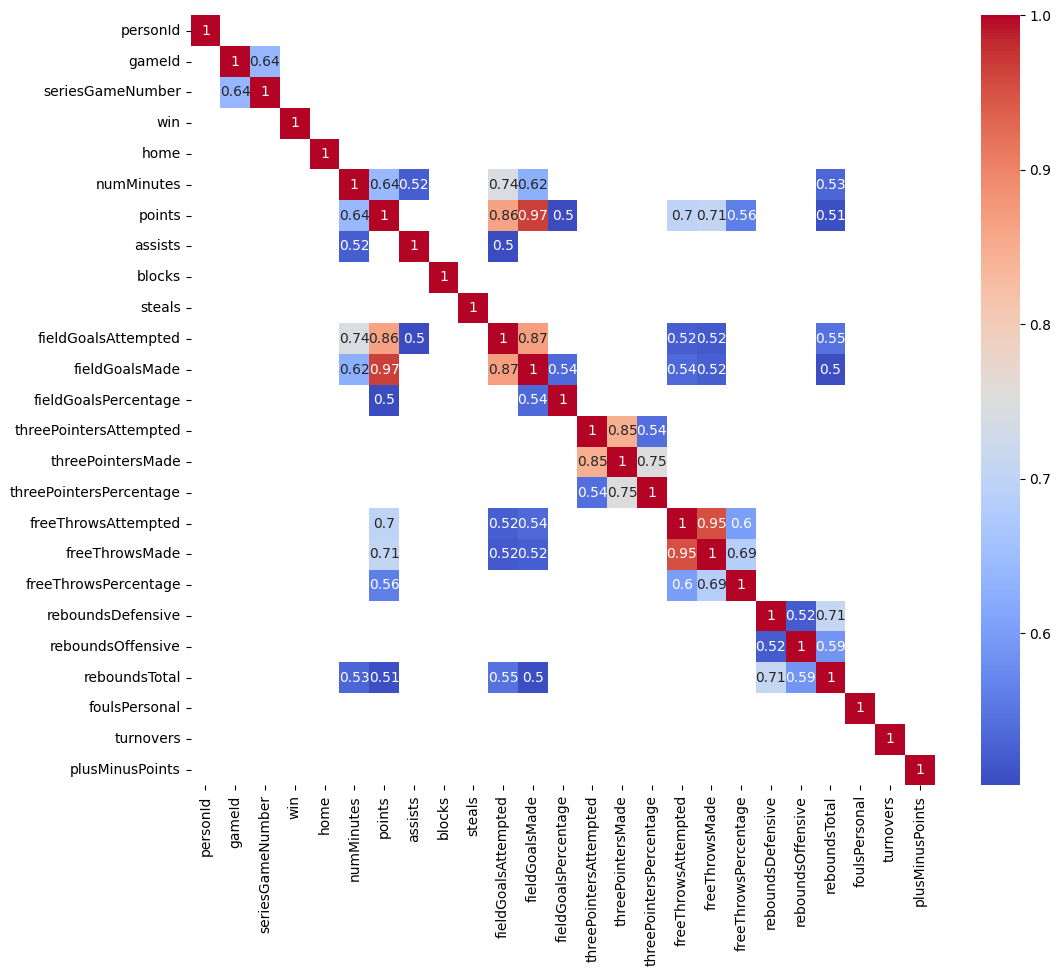

In [8]:
# How are the different variables correlated with each other?
corr = num_df.corr()
plt.figure(figsize=(12, 10))
strong_corr = corr[(corr > 0.5) | (corr < -0.5)]
sns.heatmap(strong_corr, annot=True, cmap="coolwarm")


In [9]:
# Group by points based on numMinutes
df_grouped = df.groupby('points')['numMinutes'].mean().sort_values(ascending=False).reset_index()
df_grouped

,points,numMinutes
0,78.0,63.000000
1,69.0,50.000000
2,65.0,48.000000
3,72.0,48.000000
4,66.0,48.000000
...,...,...
72,4.0,15.865597
73,3.0,13.923371
74,2.0,11.682842
75,1.0,10.104870


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627438 entries, 0 to 1627437
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   firstName                1627438 non-null  object 
 1   lastName                 1627438 non-null  object 
 2   personId                 1627438 non-null  int64  
 3   gameId                   1627438 non-null  int64  
 4   gameDate                 1627438 non-null  object 
 5   playerteamCity           1627438 non-null  object 
 6   playerteamName           1627438 non-null  object 
 7   opponentteamCity         1627438 non-null  object 
 8   opponentteamName         1627438 non-null  object 
 9   gameType                 1627438 non-null  object 
 10  gameLabel                90583 non-null    object 
 11  gameSubLabel             4387 non-null     object 
 12  seriesGameNumber         135048 non-null   float64
 13  win                      1627438 non-null 

In [11]:
# Greater than 0 minutes played
df_gt_zeroMin = df[df['numMinutes'] > 0]

# Shape of the new df
df_gt_zeroMin.shape

(1362774, 35)

In [12]:
avg_points_stats = df_gt_zeroMin.groupby(['firstName', 'lastName', 'gameLabel'])['points'].agg(
    avg_points='mean',   # average points
    games_count='count'  # number of entries/games
).sort_values(by='games_count', ascending=False)

# Drop rows where average points are zero
avg_points_stats = avg_points_stats[avg_points_stats['avg_points'] > 0]

avg_points_stats

,,,avg_points,games_count
firstName,lastName,gameLabel,,
Tim,Duncan,West - First Round,18.700000,90
Tony,Parker,West - First Round,18.088889,90
Chris,Paul,West - First Round,19.988636,88
Al,Horford,East - First Round,12.602410,83
Tim,Duncan,West - Conf. Semifinals,22.256098,82
...,...,...,...,...
Johnny,Jones,NBA Finals,2.000000,1
Stephen,Curry,SoFi Play-In Tournament,37.000000,1
Stanley,Johnson,East - Conf. Semifinals,2.000000,1


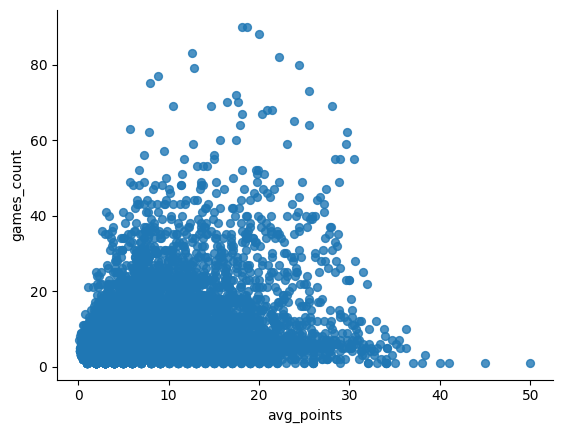

In [13]:
avg_points_stats.plot(kind='scatter', x='avg_points', y='games_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Some of data appears to be skewing results due to the volume of games played (50 point average over only 1 game)

firstName  lastName          
Rick       Barry                 36.300000
Allen      Iverson               35.600000
Giannis    Antetokounmpo         35.166667
Michael    Jordan                32.916667
Jerry      West                  30.490909
Kevin      Durant                30.333333
Shai       Gilgeous-Alexander    30.285714
Nikola     Jokic                 30.200000
Luka       Doncic                29.200000
Shaquille  O'Neal                28.961538
Name: points, dtype: float64


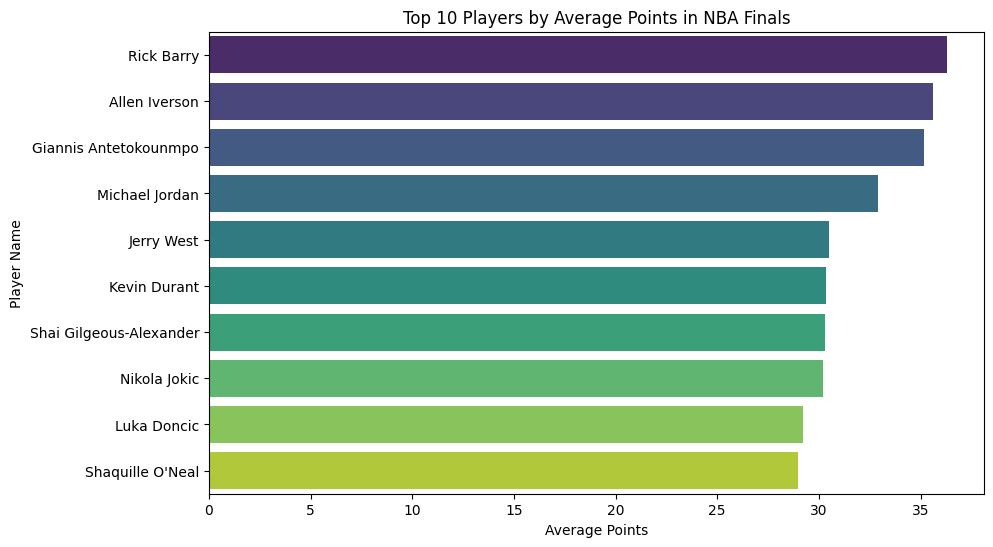

In [14]:
# Who is the most prolific scorer in the NBA Finals?
finals_df = df[(df['gameLabel'] == 'NBA Finals') & (df['numMinutes'] >= 0) & (df['points'] > 0)]

# Calculate average points per player in the NBA Finals
avg_finals_points = finals_df.groupby(['firstName', 'lastName'])['points'].mean().sort_values(ascending=False)

# Display the top 10 players
print(avg_finals_points.head(10))

# Plot the top 10 players' average points
plt.figure(figsize=(10, 6))

# Extract player names from the MultiIndex for plotting
player_names = [f"{first} {last}" for first, last in avg_finals_points.head(10).index]
sns.barplot(x=avg_finals_points.head(10).values, y=player_names, palette='viridis')
plt.title('Top 10 Players by Average Points in NBA Finals')
plt.xlabel('Average Points')
plt.ylabel('Player Name')
plt.show()

In [15]:
# Create a new column for full player name
df['player_name'] = df['firstName'] + ' ' + df['lastName']

In [16]:
def graph_player_perf(df, player_name):
    # --- Setup ---
    metrics_to_plot = ['points', 'assists', 'reboundsTotal', 'plusMinusPoints']
    game_types = ['Regular Season', 'Playoffs']
    colors = {'Regular Season': 'steelblue', 'Playoffs': 'seagreen'}

    # Create bins for minutes
    bin_edges = np.arange(0, 61, 5)
    bin_labels = [f"{i}-{i+5}" for i in range(0, 60, 5)]

    # --- Loop through metrics ---
    for metric in metrics_to_plot:
        plt.figure(figsize=(8,5))

        for game_type in game_types:
            # Filter by player and game type
            df_filtered = df[
                (df['player_name'] == player_name) &
                (df['gameType'] == game_type)
            ].copy()

            if df_filtered.empty:
                continue

            # Bin minutes
            df_filtered['minutes_bin'] = pd.cut(df_filtered['numMinutes'], bins=bin_edges, labels=bin_labels, include_lowest=True)

            # Aggregate averages by bin
            df_grouped = df_filtered.groupby('minutes_bin')[metric].mean().reset_index()

            # Convert bin label midpoints for plotting line
            df_grouped['minutes_mid'] = [int(x.split('-')[0]) + 2.5 for x in df_grouped['minutes_bin'].astype(str)]

            # Plot line (binned average)
            plt.plot(df_grouped['minutes_mid'], df_grouped[metric],
                     label=f"{game_type} Avg",
                     linewidth=2,
                     color=colors[game_type])

            # Plot scatter (individual games)
            plt.scatter(df_filtered['numMinutes'], df_filtered[metric],
                        alpha=0.3,
                        color=colors[game_type],
                        label=f"{game_type} Games")

        plt.title(f"{player_name} – {metric} vs Minutes Played")
        plt.xlabel("Minutes Played")
        plt.ylabel(metric)
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


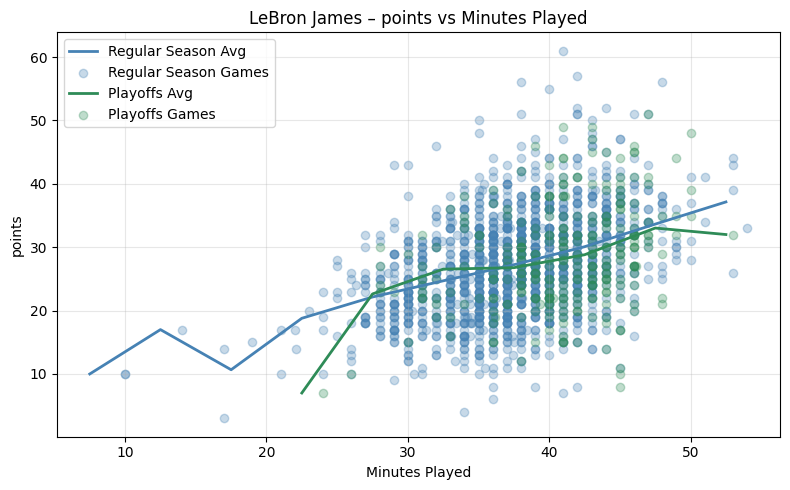

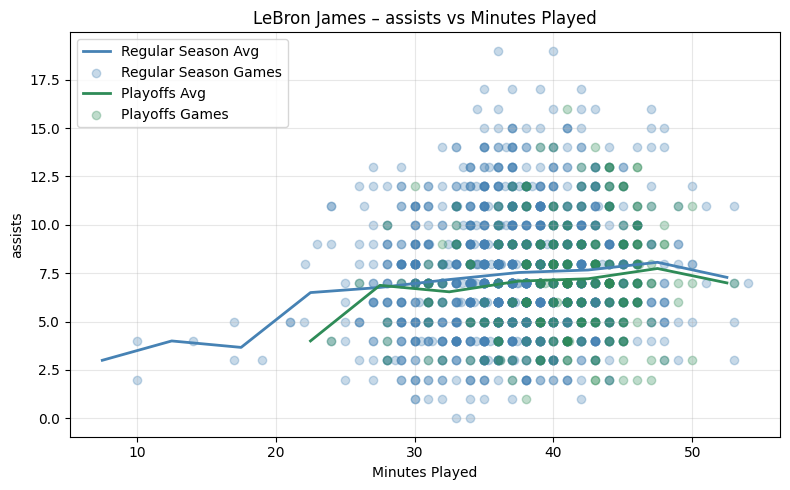

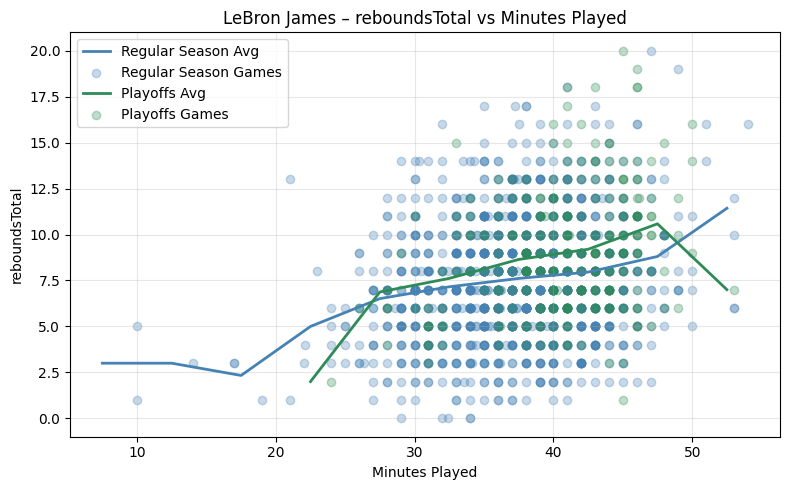

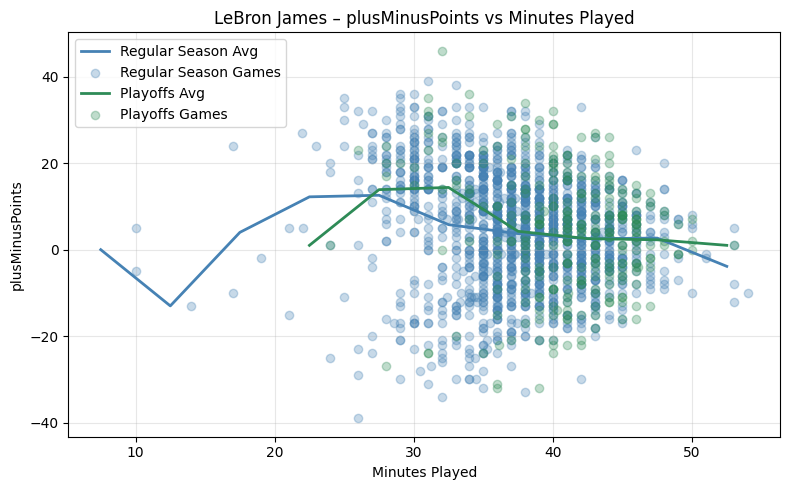

In [18]:
graph_player_perf(df, 'LeBron James')

In [19]:
# Script for feature engineering generation
import pandas as pd
import numpy as np

def create_features(df):
    """
    Generate features for NBA Player Performance Prediction.

    Input:
        df: pd.DataFrame
            Raw game-by-game data with columns including:
            ['personId', 'gameDate', 'points', 'assists', 'reboundsTotal',
             'numMinutes', 'fieldGoalsPercentage', 'threePointersPercentage',
             'freeThrowsPercentage', 'home', 'opponentteamName', ...]

    Output:
        df_features: pd.DataFrame
            Feature-engineered dataframe ready for modeling, including rolling averages,
            days of rest, interaction terms, and encoded categorical variables.
    """

    # Ensure gameDate is datetime
    df['gameDate'] = pd.to_datetime(df['gameDate'])

    # Sort by player and date
    df = df.sort_values(['personId', 'gameDate']).reset_index(drop=True)

    # ----------------------
    # Rolling averages (last 3, 5, 10 games)
    # ----------------------
    rolling_windows = [3, 5, 10]
    stats_cols = ['points', 'assists', 'reboundsTotal', 'numMinutes',
                  'fieldGoalsPercentage', 'threePointersPercentage', 'freeThrowsPercentage']

    for col in stats_cols:
        for window in rolling_windows:
            df[f'{col}_last{window}_avg'] = df.groupby('personId')[col]\
                                              .transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())

    # ----------------------
    # Days rest feature
    # ----------------------
    df['days_rest'] = df.groupby('personId')['gameDate'].diff().dt.days
    df['days_rest'].fillna(3, inplace=True)  # assume 3 if first game

    # ----------------------
    # Interaction features
    # ----------------------
    df['minutes_x_points_last5'] = df['numMinutes'] * df['points_last5_avg']

    # ----------------------
    # Encode categorical features
    # ----------------------
    # Home is already 0/1, leave as is
    # One-hot encode opponent team
    df = pd.get_dummies(df, columns=['opponentteamName'], prefix='opp')

    # One-hot encode game types
    df = pd.get_dummies(df, columns=['gameType'], prefix='gameType')


    # ----------------------
    # Shift target variable (next-game points)
    # ----------------------
    df['next_game_points'] = df.groupby('personId')['points'].shift(-1)

    # Drop rows where target is NaN (last game for each player)
    df_features = df.dropna(subset=['next_game_points']).reset_index(drop=True)

    return df_features


In [20]:
df_features = create_features(df)

In [31]:
df_features

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,gameLabel,gameSubLabel,...,opp_Warriors,opp_Wizards,opp_Zephyrs,gameType_NBA Cup,gameType_NBA Emirates Cup,gameType_Play-in Tournament,gameType_Playoffs,gameType_Preseason,gameType_Regular Season,next_game_points
0,Byron,Scott,2,28300002,1983-10-28 20:00:00,Los Angeles,Lakers,Kansas City,NaN,NaN,...,False,False,False,False,False,False,False,False,True,0.0
1,Byron,Scott,2,28300010,1983-10-29 20:00:00,Los Angeles,Lakers,Utah,NaN,NaN,...,False,False,False,False,False,False,False,False,True,8.0
2,Byron,Scott,2,28300035,1983-11-02 20:00:00,Los Angeles,Lakers,San Diego,NaN,NaN,...,False,False,False,False,False,False,False,False,True,7.0
3,Byron,Scott,2,28300053,1983-11-05 20:00:00,Los Angeles,Lakers,Dallas,NaN,NaN,...,False,False,False,False,False,False,False,False,True,12.0
4,Byron,Scott,2,28300066,1983-11-08 20:00:00,Los Angeles,Lakers,Denver,NaN,NaN,...,False,False,False,False,False,False,False,False,True,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620897,Yuki,Kawamura,1642530,22401129,2025-04-05 19:00:00,Memphis,Grizzlies,Detroit,NaN,NaN,...,False,False,False,False,False,False,False,False,True,0.0
1620898,Yuki,Kawamura,1642530,22401170,2025-04-10 21:30:00,Memphis,Grizzlies,Minnesota,NaN,NaN,...,False,False,False,False,False,False,False,False,True,0.0
1620899,Yuki,Kawamura,1642530,22401180,2025-04-11 21:00:00,Memphis,Grizzlies,Denver,NaN,NaN,...,False,False,False,False,False,False,False,False,True,12.0
1620900,Wesley,Matthews,1962936250,10900001,2009-10-01 21:00:00,Utah,Jazz,Denver,NaN,NaN,...,False,False,False,False,False,False,False,True,False,16.0


In [32]:
# Drop all object/non-essential columns from the data frame
df_features_num = df_features.drop(columns=["firstName", "lastName", "personId", "gameId", "gameDate", "gameLabel",
                                        "gameSubLabel", "seriesGameNumber", "playerteamCity", "playerteamName",
                                        "opponentteamCity", "player_name"])

In [34]:
# Ensure that all non-numeric columns are removed
non_numeric_cols = df_features_num.select_dtypes(include=['object']).columns.tolist()
print(non_numeric_cols)

[]


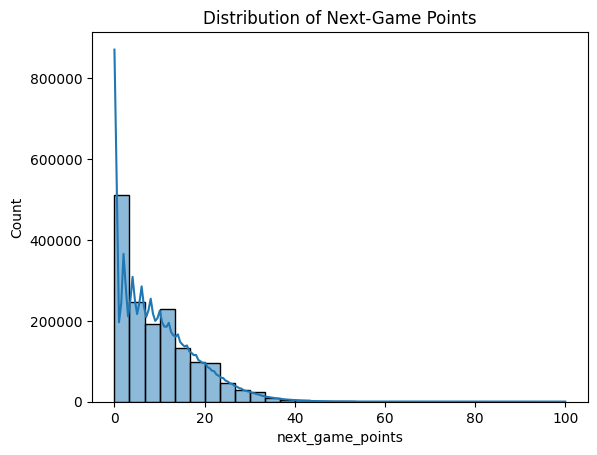

In [35]:
# Distribution of next game points
sns.histplot(df_features['next_game_points'], bins=30, kde=True)
plt.title("Distribution of Next-Game Points")
plt.show()


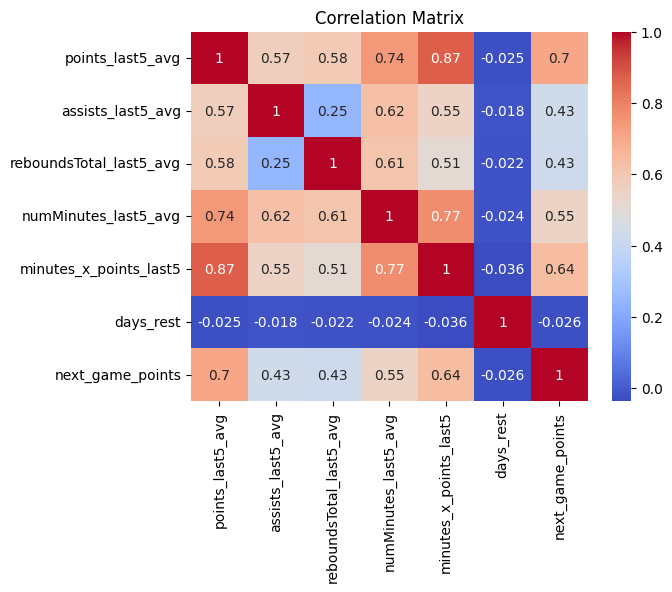

In [36]:
# Heatmap Correlation
numeric_cols = ['points_last5_avg', 'assists_last5_avg', 'reboundsTotal_last5_avg',
                'numMinutes_last5_avg', 'minutes_x_points_last5', 'days_rest']
corr = df_features[numeric_cols + ['next_game_points']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


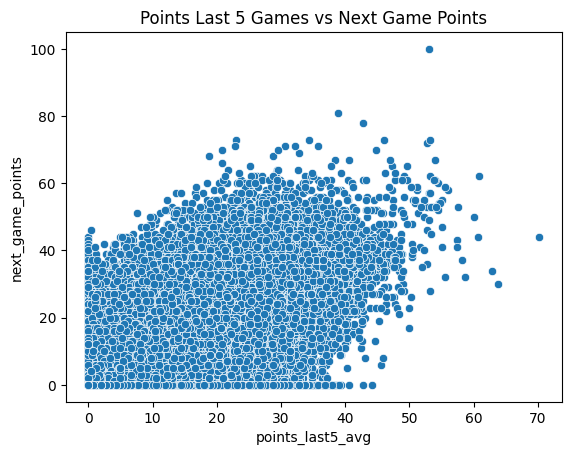

In [37]:
# Rolling average trends
sns.scatterplot(x='points_last5_avg', y='next_game_points', data=df_features)
plt.title("Points Last 5 Games vs Next Game Points")
plt.show()


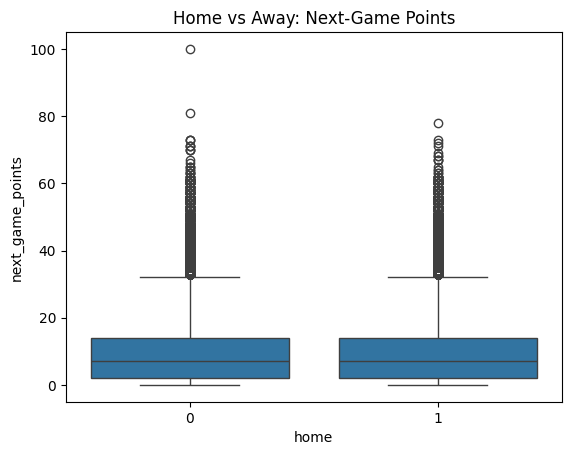

In [38]:
# Game context features
sns.boxplot(x='home', y='next_game_points', data=df_features)
plt.title("Home vs Away: Next-Game Points")
plt.show()


# Data Preprocessing

In [39]:
df_features_num.dropna(how='any', axis=0, inplace=True)

In [40]:
df_features_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1438447 entries, 1 to 1620901
Data columns (total 91 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   win                                 1438447 non-null  int64  
 1   home                                1438447 non-null  int64  
 2   numMinutes                          1438447 non-null  float64
 3   points                              1438447 non-null  float64
 4   assists                             1438447 non-null  float64
 5   blocks                              1438447 non-null  float64
 6   steals                              1438447 non-null  float64
 7   fieldGoalsAttempted                 1438447 non-null  float64
 8   fieldGoalsMade                      1438447 non-null  float64
 9   fieldGoalsPercentage                1438447 non-null  float64
 10  threePointersAttempted              1438447 non-null  float64
 11  threePointersMad

In [41]:
# Convert any float64 into float32
df_features_num = df_features_num.astype(np.float32)

In [42]:
df_features_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1438447 entries, 1 to 1620901
Data columns (total 91 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   win                                 1438447 non-null  float32
 1   home                                1438447 non-null  float32
 2   numMinutes                          1438447 non-null  float32
 3   points                              1438447 non-null  float32
 4   assists                             1438447 non-null  float32
 5   blocks                              1438447 non-null  float32
 6   steals                              1438447 non-null  float32
 7   fieldGoalsAttempted                 1438447 non-null  float32
 8   fieldGoalsMade                      1438447 non-null  float32
 9   fieldGoalsPercentage                1438447 non-null  float32
 10  threePointersAttempted              1438447 non-null  float32
 11  threePointersMad

In [43]:
df_features_num.head()

,win,home,numMinutes,points,assists,blocks,steals,fieldGoalsAttempted,fieldGoalsMade,fieldGoalsPercentage,...,opp_Warriors,opp_Wizards,opp_Zephyrs,gameType_NBA Cup,gameType_NBA Emirates Cup,gameType_Play-in Tournament,gameType_Playoffs,gameType_Preseason,gameType_Regular Season,next_game_points
1,1.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
2,0.0,0.0,22.0,8.0,6.0,1.0,2.0,10.0,4.0,0.400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
3,0.0,0.0,21.0,7.0,1.0,1.0,1.0,14.0,3.0,0.213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
4,1.0,0.0,17.0,12.0,0.0,1.0,0.0,8.0,3.0,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
5,1.0,1.0,16.0,9.0,3.0,0.0,0.0,5.0,4.0,0.800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [44]:
df_sample = df_features_num.sample(n=200_000, random_state=1)

In [45]:
df_sample.isna().sum()

,0
win,0
home,0
numMinutes,0
points,0
assists,0
...,...
gameType_Play-in Tournament,0
gameType_Playoffs,0
gameType_Preseason,0
gameType_Regular Season,0


In [46]:
y = df_sample['next_game_points']
X = df_sample.drop(columns=['next_game_points'])

In [47]:
# Split data into training, validation, and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the temporary set into train and validation:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Print the shape
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120000, 90) (120000,)
Validation set shape: (40000, 90) (40000,)
Testing set shape: (40000, 90) (40000,)


# Model Building

In [48]:
def model_performance_regression_sklearn(model, predictors, target):
    """
    Function to compute regression model performance metrics

    model: trained regressor
    predictors: independent variables (X)
    target: dependent variable (y)
    """
    pred = model.predict(predictors)

    mae = mean_absolute_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    r2 = r2_score(target, pred)

    df_perf = pd.DataFrame(
        {"MAE": [mae], "RMSE": [rmse], "R2": [r2]}
    )

    return df_perf

def plot_predicted_vs_actual(model, predictors, target):
    """
    Scatter plot of predicted vs actual values for regression

    model: trained regressor
    predictors: independent variables (X)
    target: dependent variable (y)
    """
    y_pred = model.predict(predictors)

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=target, y=y_pred, alpha=0.5)
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'r--', lw=2)  # 45-degree line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Predicted vs Actual")
    plt.show()


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = []  # Create an empty list to store all of the models

# Append the models to the list
models.append(("Bagging", BaggingRegressor(random_state=1)))
models.append(("Random Forest", RandomForestRegressor(random_state=1)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=1)))
models.append(("GBM", GradientBoostingRegressor(random_state=1)))
models.append(("XGBoost", XGBRegressor(random_state=1)))
models.append(("dtree", DecisionTreeRegressor(random_state=1)))

print('\nTraining Performance:\n')
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae = mean_absolute_error(y_train, y_pred_train)
    r2 = r2_score(y_train, y_pred_train)

    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}')

print('\nValidation Performance:\n')
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mae = mean_absolute_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)

    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}')



Training Performance:

Bagging: RMSE=2.62, MAE=1.88, R²=0.905
Random Forest: RMSE=2.21, MAE=1.69, R²=0.932
AdaBoost: RMSE=7.83, MAE=6.69, R²=0.148
GBM: RMSE=5.81, MAE=4.46, R²=0.531
XGBoost: RMSE=5.33, MAE=4.12, R²=0.605
dtree: RMSE=0.00, MAE=0.00, R²=1.000

Validation Performance:

Bagging: RMSE=6.21, MAE=4.77, R²=0.465
Random Forest: RMSE=5.94, MAE=4.56, R²=0.510
AdaBoost: RMSE=7.86, MAE=6.71, R²=0.144
GBM: RMSE=5.89, MAE=4.51, R²=0.519
XGBoost: RMSE=5.98, MAE=4.56, R²=0.505
dtree: RMSE=8.48, MAE=6.38, R²=0.003


# Observations:

- Decision Tree: overfitting, perfect on training, terrible on validation
- Random Forest/GBM/XGBoost: all are performing roughly the same.
- Bagging: Strong on training, but lags out on validation.
- AdaBoost: Weak... may not capture nonlinear relationships.


In [50]:
# import gc

# # List of regression models to compare
# models = [
#     ("Bagging", BaggingRegressor(random_state=1)),
#     ("Random Forest", RandomForestRegressor(random_state=1, n_jobs=-1)),
#     ("AdaBoost", AdaBoostRegressor(random_state=1)),
#     ("GBM", GradientBoostingRegressor(random_state=1)),
#     ("XGBoost", XGBRegressor(random_state=1, n_jobs=-1, verbosity=0)),
#     ("Decision Tree", DecisionTreeRegressor(random_state=1))
# ]

# # Store results
# results = []

# print('\nValidation Performance:\n')
# for name, model in models:
#     print(f"Training {name}...")
#     # Train model
#     model.fit(X_train, y_train)

#     # Predict on validation set
#     y_val_pred = model.predict(X_val)

#     # Evaluate
#     mae = mean_absolute_error(y_val, y_val_pred)
#     rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
#     r2 = r2_score(y_val, y_val_pred)

#     results.append((name, mae, rmse, r2))

#     print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}\n")

#     # Free memory
#     del model
#     gc.collect()

# # Optional: summarize results in a DataFrame for easy comparison
# results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
# results_df = results_df.sort_values("RMSE")
# print(results_df)


In [51]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1]
}

grid = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=1),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)


{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.05} -5.857414116931847


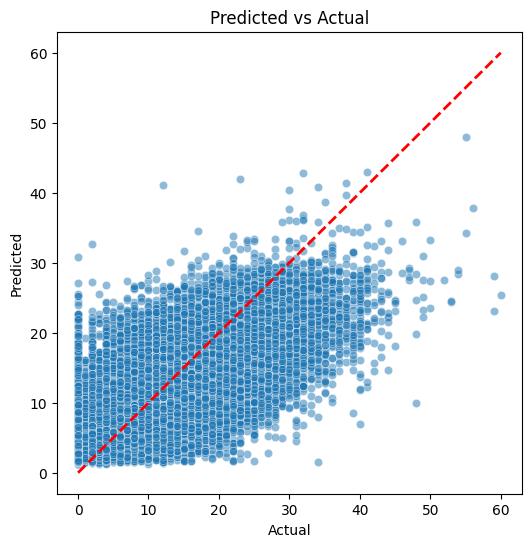

In [52]:
plot_predicted_vs_actual(grid, X_val, y_val)

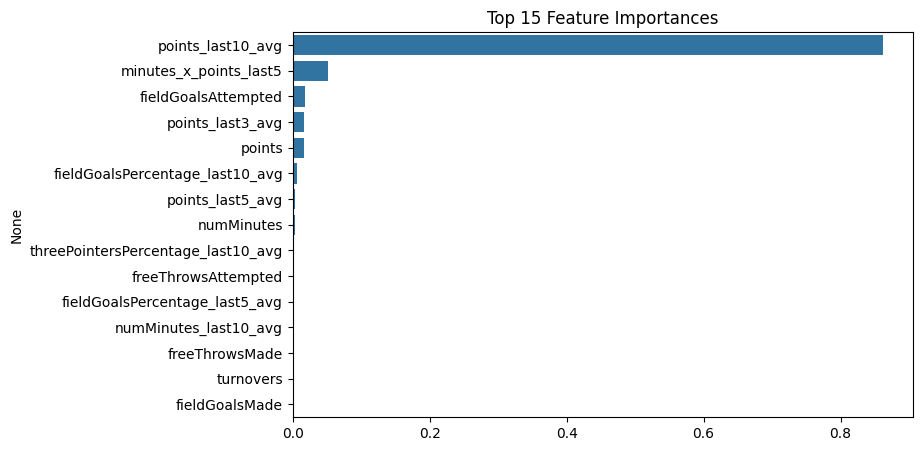

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(grid.best_estimator_.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.show()


In [54]:
# Define a baseline XGBoost model
xgb_model = XGBRegressor(
    random_state=1,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # faster for large data
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_val)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R²: {r2:.3f}")


Validation RMSE: 5.93
Validation MAE: 4.53
Validation R²: 0.512


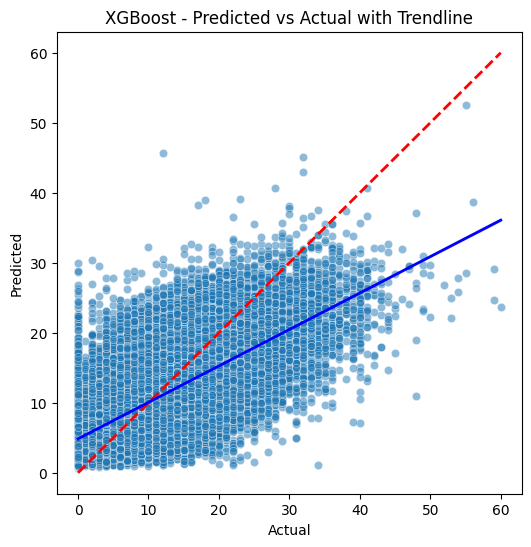

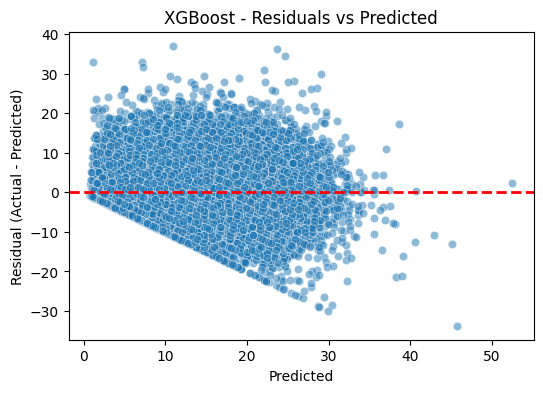

In [55]:
# ---- Predicted vs Actual ----
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
sns.regplot(x=y_val, y=y_pred, scatter=False, color='blue', line_kws={'lw':2})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost - Predicted vs Actual with Trendline')
plt.show()

# ---- Residuals Plot ----
residuals = y_val - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('XGBoost - Residuals vs Predicted')
plt.show()


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=1, tree_method='hist', n_jobs=-1)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best R²: 0.5236241221427917


In [57]:
best_xgb = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    subsample=0.8,
    random_state=1,
    tree_method='hist',
    n_jobs=-1
)

# Train on all available data except test
X_train_final = pd.concat([X_train, X_val])
y_train_final = pd.concat([y_train, y_val])

best_xgb.fit(X_train_final, y_train_final)

# Save the trained model
best_xgb.save_model("nba_points_model.json")

# Evaluate on test set
y_pred_test = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.3f}")

Test RMSE: 5.91
Test MAE: 4.51
Test R²: 0.517


In [ ]:
#testing colab push to github